# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 1: Answers
**a)** The expression for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ is: 
$$
\boldsymbol{\hat{\beta}_{OLS}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{y})
$$
We want to compute $\mathbb{E}[\boldsymbol{\hat{\beta}_{OLS}}]$:
$$
\mathbb{E}[\boldsymbol{\hat{\beta}_{OLS}}] = \mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{y})]=(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\mathbb{E}[\boldsymbol{y}], 
$$
where we have used the calculation rules of expectation values. The next step is to recall the assumption that $\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}$, so the expression can be rewritten as:
$$
(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\mathbb{E}[\boldsymbol{X\beta} + \epsilon] = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T(\mathbb{E}[\boldsymbol{X}\boldsymbol{\beta}] + \mathbb{E}[\epsilon]) = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T(\mathbb{E}[\boldsymbol{X}\boldsymbol{\beta}] + 0) = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{X}(\mathbb{E}[\boldsymbol{\beta}]) = \mathbb{E}[\boldsymbol{\beta}]=\boldsymbol{\beta},
$$
where we have used that $\epsilon$ is normal distributed with expectation 0.

**b)**

The variance of $\boldsymbol{\hat{\beta}_{OLS}}$ can be written as:
$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \mathbb{E}[(\boldsymbol{\hat{\beta}_{OLS}}-\mathbb{E}[\boldsymbol{\hat{\beta}_{OLS}}])^2]
$$
Using the expression for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$, and the result from a), we get:
$$
\mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{y})-\boldsymbol{\beta})^2] = \mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T(\boldsymbol{X\beta} + \epsilon))-\boldsymbol{\beta})^2] = \mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{\beta} + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\epsilon - \boldsymbol{\beta})^2] = \mathbb{E}[(\boldsymbol{\beta}-\boldsymbol{\beta} + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\epsilon)^2] = \mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\epsilon)^2]
$$

Squaring the matrix gives (we neglect $\epsilon$ for now):
$$
(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T((\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T)^T = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{X}((\boldsymbol{X}^T\boldsymbol{X})^{-1})^T = ((\boldsymbol{X}^T\boldsymbol{X})^{-1})^T = ((\boldsymbol{X}\boldsymbol{X}^T)^{-1})^T = (\boldsymbol{X}^T\boldsymbol{X})^{-1}
$$

Now we consider $\epsilon$. After squaring the matrix, the expression becomes:
$$
\mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X})^{-1}\epsilon^2] = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\mathbb{E}[\epsilon^2] = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\sigma^2,
$$
since the expectation of $\epsilon^2$ is the variance of $\epsilon$, because $\epsilon$ has mean 0. 

## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


**b)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


### Exercise 2: Answers

**a)**

The optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ is given by:
$$
\boldsymbol{\hat{\beta}_{Ridge}} = (\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$
So the expected value can be written as:
$$
\mathbb{E}[\boldsymbol{\hat{\beta}_{Ridge}}] = \mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{y}] = (\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1} \mathbb{E}[(\boldsymbol{X}^T\boldsymbol{y}]
$$

Substituting $\boldsymbol{y} = \boldsymbol{X\beta} + \epsilon$ gives:
$$
(\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1} \mathbb{E}[\boldsymbol{X}^T(\boldsymbol{X\beta} + \epsilon)] = (\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}(\boldsymbol{X}^T\boldsymbol{X}\mathbb{E}[\boldsymbol{\beta}]+\boldsymbol{X}^T\mathbb{E}[\epsilon])
$$

We know that $\mathbb{E}[\boldsymbol{\beta}]=\boldsymbol{\beta}$ and $\mathbb{E}[\epsilon] = 0$, so the expression can be re-written as:
$$
(\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}
$$


**b)**

We start by rewriting the variance in terms of expected values: 
$$
\mathbf{Var}[\boldsymbol{\hat{\beta}}] = \mathbb{E}[(\boldsymbol{\hat{\beta}}-\mathbb{E}[\boldsymbol{\hat{\beta}}])^2]
$$
We then use the expression for the optimal parameters and the expression obtained in task 2a):
$$
\mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X}+\lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{y} - (\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{\beta})^2]
$$
We then substitute $\boldsymbol{y} = \boldsymbol{X\beta} + \epsilon$, and simplify:
$$
\mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X}+\lambda \mathbf{I})^{-1}\boldsymbol{X}^T(\boldsymbol{X\beta} + \epsilon) - (\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{\beta})^2] = \mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}\boldsymbol{X}^T\epsilon)^2]
$$
Squaring the matrix and $\epsilon$ gives:
$$
\mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X}+\lambda \mathbf{I})^{-1}\boldsymbol{X}^T((\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1}\boldsymbol{X}^T)^T \epsilon^2] = 
\mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X}+\lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{X}((\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1})^T \epsilon^2] =
$$
$$
(\boldsymbol{X}^T\boldsymbol{X}+\lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{X}((\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1})^T \mathbb{E}[\epsilon^2] = 
(\boldsymbol{X}^T\boldsymbol{X}+\lambda \mathbf{I})^{-1}\boldsymbol{X}^T\boldsymbol{X}((\boldsymbol{X}^T\boldsymbol{X} + \lambda \mathbf{I})^{-1})^T \sigma^2, 
$$
since $\mathbb{E}[\epsilon^2]=\sigma^2$

## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$
In order to arrive at the equation for the bias, we have to approximate the unknown function $f$ with the output/target values $y$.

**b)** Explain what the terms mean and discuss their interpretations.


### Exercise 3: Answers

**a)** 
We start by expanding the square in the original expression:
$$
\mathbb{E}[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2]=\mathbb{E}[\boldsymbol{y}^2]-2\mathbb{E}[\boldsymbol{y}\boldsymbol{\tilde{y}}] + \mathbb{E}[\boldsymbol{\tilde{y}}^2]
$$
We now look at each term, starting with $\mathbb{E}[\boldsymbol{y}^2]$:
$$
\mathbb{E}[\boldsymbol{y}^2] = \mathbb{E}[(f + \epsilon)^2] = \mathbb{E}[f^2 + 2f\epsilon + \epsilon^2] = \mathbb{E}[f^2] + 2\mathbb{E}[f\epsilon] + \mathbb{E}[\epsilon^2]
$$
We know that $2\mathbb{E}[f\epsilon] = 0$ and $\mathbb{E}[\epsilon^2] = \sigma^2$, so we get: 
$$
\mathbb{E}[\boldsymbol{y}^2] = \mathbb{E}[f^2] + \sigma^2
$$
We then consider the term $-2\mathbb{E}[\boldsymbol{y}\boldsymbol{\tilde{y}}]$:
$$
-2\mathbb{E}[\boldsymbol{y}\boldsymbol{\tilde{y}}] = -2\mathbb{E}[(f+\epsilon)\boldsymbol{y}] = -2\mathbb{E}[f\boldsymbol{\tilde{y}}+\epsilon \boldsymbol{\tilde{y}}] = -2(\mathbb{E}[f\boldsymbol{\tilde{y}}] + \mathbb{E}[\epsilon \boldsymbol{\tilde{y}}])
$$
We know that $\mathbb{E}[\epsilon \boldsymbol{\tilde{y}}]=0$, so we get:
$$
-2\mathbb{E}[\boldsymbol{y}\boldsymbol{\tilde{y}}] = -2 \mathbb{E}[f\boldsymbol{\tilde{y}}]
$$

On the last term, we use the relation between expectation values and variance:
$$
\mathbb{E}[\boldsymbol{\tilde{y}}^2] = \mathbf{Var}[\boldsymbol{\tilde{y}}] + (\mathbb{E}[\boldsymbol{\tilde{y}}])^2
$$

Gathering all the terms gives:
$$
\mathbb{E}[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2] = \mathbb{E}[f^2] + \sigma^2 -2 \mathbb{E}[f\boldsymbol{\tilde{y}}] + \mathbf{Var}[\boldsymbol{\tilde{y}}] + (\mathbb{E}[\boldsymbol{\tilde{y}}])^2
$$
$$
= \mathbb{E}[(f-\mathbb{E}[\boldsymbol{\tilde{y}}])^2] + \mathbf{Var}[\boldsymbol{\tilde{y}}] + \sigma^2 
$$
$$
= \mathbf{Bias}[\boldsymbol{\tilde{y}}] + \mathbf{Var}[\boldsymbol{\tilde{y}}] + \sigma^2
$$

**b)**

The terms stands for the bias of the predictions compared to the target, the variance of the predictions compared to the target, and the variance of the noise in the input data (the variance of $\epsilon$). If we think of the target as a target on a shooting range, and the predictions as shots fired, we can explain the terms in the following way: 
A high bias means that the mean value of all our shots lie far away from the center of the target. If the variance is small, we can correct this by adjusting the sight (adjusting the model). A high variance means that the shots are scattered, and not gathered around a point. If we want to reduce the scatter, we need to train more (reduce the variance by training the model more).

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [1]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
targets = np.random.rand(bootstraps, n)


# Compute MSE
mse = np.mean((predictions-targets)**2)
# Compute bias
pred_mean = np.mean(predictions, axis = 0)
target_mean = np.mean(targets, axis = 0)
bias = np.mean((pred_mean - target_mean)**2)
# Compute variance
var_per_point = np.mean((predictions - pred_mean)**2, axis = 0)
variance = np.mean(var_per_point)

### Printing, and checking that bias + variance is approx. = mse
print("Bias: ", bias)
print("Variance: ", variance)
print("MSE: ", mse)
print("Variance + bias: ", variance + bias)

Bias:  210.58779586411154
Variance:  8.289633669793657
MSE:  218.95151017978932
Variance + bias:  218.8774295339052


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


### Answers a-c
**a)** The sum of bias and variance is approximately equal to the MSE. 

**b)** Increasing the offset (the constant at the end of the prediction term) while decreasing the amplitude of the noise results in increased bias and reduced variance: 

Amplitude = 0.1, offset = 100 results in bias = 9909 and variance = 0.0008

**c)** Increasing the amplitude of the noise while decreasing the offset results in increased variance and decreased bias:


Amplitude = 15, offset = 5 results in bias = 144 and variance = 18.77


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

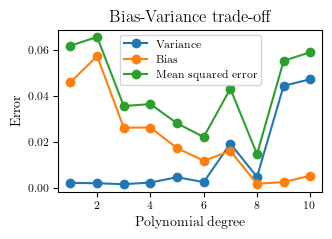

In [10]:
n = 100
bootstraps = 1000

# Define the function without the noise
def f(x):
    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))

x = np.linspace(-3, 3, n)
y = f(x) + np.random.normal(0, 0.1, size=n)

biases = []
variances = []
mses = []

x = x.reshape(-1, 1)
deg_min = 1
deg_max = 10

# Fixed train/test-split used on all degrees for comparable results
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123)
n_test_points = len(y_test)
n_train_points = len(y_train)

# noiseless target on the fixed test inputs (for bias only)
f_test = f(x_test.ravel())

for p in range(deg_min, deg_max + 1):
    # Make polynomial features
    poly_features = PolynomialFeatures(degree=p)

    # Built design matrix (fixed train/test-split)
    X_train = poly_features.fit_transform(x_train)
    X_test  = poly_features.transform(x_test)

    # Make array for predictions
    predictions = np.zeros((bootstraps, n_test_points))
    # Define targets (noisy) for MSE
    target = y_test

    for b in range(bootstraps):
        # Make bootstrap sample
        X_train_re, y_train_re = resample(
            X_train, y_train, n_samples=n_train_points, random_state=b
        )
        # Fit model on the sample data:
        poly_model = LinearRegression(fit_intercept=False).fit(X_train_re, y_train_re)
        # Make predictions on test data:
        poly_predict = poly_model.predict(X_test)
        # Add predictions to array
        predictions[b, :] = poly_predict

    # Calculate bias against the noiseless function on the fixed test inputs
    pred_mean = np.mean(predictions, axis=0)
    biases.append(np.mean((pred_mean - f_test)**2))

    # Calculate variance (per test point over bootstraps, then average)
    var_per_point = np.mean((predictions - pred_mean)**2, axis=0)
    variances.append(np.mean(var_per_point))

    # Calculate MSE against the noisy targets
    mses.append(np.mean((predictions - target)**2))

# Plotting results

# ---- Sett LaTeX-font og størrelser til å matche revtex4 (10 pt) ----
plt.rcParams.update({
    "text.usetex": True,       # bruk LaTeX for tekst
    "font.family": "serif",    # Computer Modern Serif
    "font.size": 10,           # revtex4 default 10 pt
    "axes.labelsize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
})

# ---- Konverter kolonnebredde fra pt til inches for matplotlib ----
pt_per_inch = 72.27
columnwidth_pt = 246.0  # fra LaTeX \columnwidth
fig_width_in = columnwidth_pt / pt_per_inch

# Valgfri høyde: bruk gyllen ratio eller annen
golden_ratio = 1.618
fig_height_in = fig_width_in / golden_ratio

# ---- Lag figur med riktig bredde ----
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))

degrees = np.arange(deg_min, deg_max + 1)
plt.plot(degrees, variances, marker="o", label="Variance")
plt.plot(degrees, biases, marker="o", label="Bias")
plt.plot(degrees, mses, marker="o", label="Mean squared error")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.title("Bias-Variance trade-off")
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig("bias_variance.pdf", bbox_inches='tight')


**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

### Exercise 4e: Answers

The figure shows the bias-variance trade-off: When the complexity of the model increases, the bias is reduced, while the variance increases. So increasing the model complexity leads to overfitting. When choosing a model complexity, we should try to minimize the MSE, so in this case we should choose a degree between 6 and 8.  




**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).

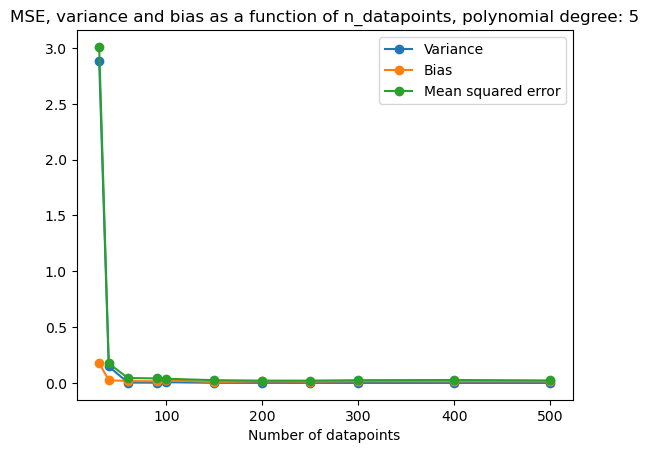

In [4]:
# Define list of n_datapoints:
n_datapoints = np.array([30, 40, 60, 90, 100, 150, 200, 250, 300, 400, 500])
# Define number of bootstraps:
bootstraps = 1000
# Define polynomial degree: 
poly_deg = 5
# Define the function without the noise
def f(x):
    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))
# Define empty lists of mse, bias and variance:
biases = []
variances = []
mses = []

# Looping over n_datapoints: 
for n in n_datapoints:
    # Define x-array
    x = np.linspace(-3, 3, n)
    # Define target with noise
    y = f(x) + np.random.normal(0, 0.1, size=n)
    # Reshape x
    x = x.reshape(-1, 1)
    # Train/test split:
    x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123)
    n_test_points = len(y_test)
    n_train_points = len(y_train)

    # noiseless target on the fixed test inputs (for bias only)
    f_test = f(x_test.ravel())
    
    # Make polynomial features
    poly_features = PolynomialFeatures(degree=poly_deg)

    # Build design matrix (fixed train/test-split)
    X_train = poly_features.fit_transform(x_train)
    X_test  = poly_features.transform(x_test)

    # Make array for predictions
    predictions = np.zeros((bootstraps, n_test_points))
    # Define targets (noisy) for MSE
    target = y_test
    
    for b in range(bootstraps):
        # Make bootstrap sample
        X_train_re, y_train_re = resample(
            X_train, y_train, n_samples=n_train_points, random_state=b
        )
        # Fit model on the sample data:
        poly_model = LinearRegression(fit_intercept=False).fit(X_train_re, y_train_re)
        # Make predictions on test data:
        poly_predict = poly_model.predict(X_test)
        # Add predictions to array
        predictions[b, :] = poly_predict
        
    # Calculate bias against the noiseless function on the fixed test inputs
    pred_mean = np.mean(predictions, axis=0)
    biases.append(np.mean((pred_mean - f_test)**2))

    # Calculate variance (per test point over bootstraps, then average)
    var_per_point = np.mean((predictions - pred_mean)**2, axis=0)
    variances.append(np.mean(var_per_point))

    # Calculate MSE against the noisy targets
    mses.append(np.mean((predictions - target)**2))

# Plotting results
plt.plot(n_datapoints, variances, marker="o", label="Variance")
plt.plot(n_datapoints, biases, marker="o", label="Bias")
plt.plot(n_datapoints, mses, marker="o", label="Mean squared error")
plt.xlabel("Number of datapoints")
plt.title(f"MSE, variance and bias as a function of n_datapoints, polynomial degree: {poly_deg}")
plt.legend()
plt.show()



### Comments to 4f
We start by comparing the figures for degree 7 and 2:

![Degree 5:](4f_polydeg_5.png)
![Degree 2:](4f_polydeg_2_1.png)


We see that the model with a high complexity has a huge variance for small n_datapoints. Both the variance and the bias is quickly reduced with increasing n, and they stay the same while n is larger than 100. 

For the low-complexity model, we get å large bias for low n, and a relatively small variance. Both the variance and the bias is reduced by increasing n, and they stay relatively flat for n>100. The bias is larger than the variance for this model. 

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

**d)** Why do we say that the Ridge method gives a biased model?

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

**h)** What is an advantage of the R2 score over the MSE?


### Exercise 5: Answers

**a)**

We scale data for a number of reasons. It can help reduce numerical instability when inverting matrices, and it can help "balance" features, so they are comparable. In Ridge and Lasso, the penalty depends on coefficient size, so by scaling the data we make the features comparable, ensuring that the correct penalty is given to each feature.

**b)**

Because there is no penalty. And if you scale a column of the design matrix by a constant c, the corresponding feature will be divided by this c. 

**c)**

Because the penalty is applied directly to the coefficients. So a large coefficient will get a larger penalty. By scaling the data, we make the features comparable, so the coefficients get the "correct" penalty, ensuring that the model becomes "correct"

**d)**

Because in Ridge the coefficients are shrunk towards zero. This introduces bias, but reduces variance. So overall, we may get a smaller mean squared error. 

**e)**

MSE is not affected by scaling the feature matrix. It is affected by scaling the target data.

**f)**

Neither scaling the feature matrix nor scaling the target data will affect the R2 score. 

**g)**

R2 = 0: This means that the model does no better than just predicting the mean of the target variable. It explains none of the variance in the data.

R2 = 0.5: The model explains 50% of the variance in the data, compared to computing the mean. 

R2 = 1: This means that the model perfectly predicts the data, and explains 100% of the variance in the target variable. 

**h)**

R2 is easier to interpret, because it can be interpreted as "percent of variance explained by the model". It is also dimensionless, so it is easy to compare the R2 score across models and data. The MSE is not dimensionless.